In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.help()


__________NERLNET CHECKLIST__________
Nerlnet configuration files are located at config directory.
Make sure data and jsons in correct folder, and jsons include the correct paths
* Data includes: a single csv that includes all the data for the experiment (training and prediction phases)
* Jsons include: - distributed configuration (dc_<name>.json)
                 - connection map (conn_<name>.json)
                 - experiment flow (exp_<name>.json)
* Jsons directory: can be defined by changing the config file: config/jsonsDir.nerlconfig

____________API COMMANDS_____________
==========Setting experiment========

-showJsons():                                           lists available json files in jsons directory (dc, conn, exp) to be used with setJsons and getUserJsons
-list_datasets():                                       reads `hf_repo_ids.json` and list of datasets and files of Nerlnet organizaion on https://huggingface.co/Nerlnet
-download_dataset(idx, dir):                   

In [4]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_EEG_1d_2c_1s_4r_4w.json
1.	dc_eeg_5d_4w_2c_4s_2r.json.json
2.	dc_eeg_freq_5d_4w_2c_4s_2r.json
3.	dc_synt_8d_8w_2c_4s_4r.json
4.	dc_synt_8d_8w_4c_6r_4s.json
5.	dc_synt_distributed_w5_c3_6r_3s_3d.json
6.	dc_test_synt_1d_2c_1s_4r_4w.json
7.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json
12.	conn_2Router2ClientsGUI.json
13.	conn_2Router3Clients.json
14.	conn_3Router3Clients.json
15.	conn_6RouterCycle6Clients1Source.json
16.	conn_6RouterCycle8Clients1Source.json
17.	conn_6RouterLine6Clients1Sourc

In [5]:
dc = 2
conn = 20
exp = 2
API.setJsons(dc , conn , exp)

In [6]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [7]:
API.list_datasets()

[INFO][2024-05-27 17:14:07,695] 0. Nerlnet/skab: ['skab_full.csv']
[INFO][2024-05-27 17:14:07,696] 1. Nerlnet/MNist: []
[INFO][2024-05-27 17:14:07,696] 2. Nerlnet/synthetic_norm: ['synthetic_full.csv']
[INFO][2024-05-27 17:14:07,696] 3. Nerlnet/EEG_Eye_State_Classification: ['EEG_Eye_State_Classification.csv', 'EEG_Eye_State_Classification_table_freq_window.csv']
[INFO][2024-05-27 17:14:07,697] 4. Nerlnet/EEG_Eye_State_Classification_table_freq_window: ['EEG_Eye_State_Classification_table_freq_window.csv']


In [8]:
API.add_repo_to_datasets_list("Nerlnet/EEG_Eye_State_Classification_table_freq_window", "EEG_freq_eye_state_classification", "3 class of classification")

Repository Nerlnet/EEG_Eye_State_Classification_table_freq_window already exists in the hf_repo_ids.json


In [9]:
API.list_datasets()

[INFO][2024-05-27 17:14:08,426] 0. Nerlnet/skab: ['skab_full.csv']
[INFO][2024-05-27 17:14:08,427] 1. Nerlnet/MNist: []
[INFO][2024-05-27 17:14:08,427] 2. Nerlnet/synthetic_norm: ['synthetic_full.csv']
[INFO][2024-05-27 17:14:08,428] 3. Nerlnet/EEG_Eye_State_Classification: ['EEG_Eye_State_Classification.csv', 'EEG_Eye_State_Classification_table_freq_window.csv']
[INFO][2024-05-27 17:14:08,428] 4. Nerlnet/EEG_Eye_State_Classification_table_freq_window: ['EEG_Eye_State_Classification_table_freq_window.csv']


In [10]:
API.download_dataset(4)

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO][2024-05-27 17:14:08,582] Files downloaded to /tmp/nerlnet/data/NerlnetData-master/nerlnet/EEG_freq_eye_state_classification


In [11]:
exp_name = "EEG_Freq_Eye_State_Classification"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-05-27 17:14:09,020] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 5 [batches/sec]
                 Batchsize: 2 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.7', '10.0.0.10', '10.0.0.8', '10.0.0.12']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1', 'c2']
                 Workers: ['w1', 'w2', 'w3', 'w4']
                 Sources: ['s1', 's2', 's3', 's4']
                 Routers: ['r1', 'r2']
[INFO][2024-05-27 17:14:09,020] Connections:
[INFO][2024-05-27 17:14:09,021] 		 r1 : ['mainServer', 'c1', 'r2', 's2', 's1']
[INFO][2024-05-27 17:14:09,022] 		 r2 : ['r1', 'c2', 's3', 's4']
[INFO][2024-05-27 17:14:09,024] Experiment name: EEG_Freq_Eye_State_Classification
[INFO][2024-05-27 17:14:09,025] Batch size: 2
[INFO][2024-05-27 17:14:09,026] Number of features: 128
[I

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-05-27 17:14:11,067] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [12]:
API.send_jsons_to_devices()

[INFO][2024-05-27 17:14:11,510] Sending distributed configurations to devices is completed


In [13]:
API.run_current_experiment_phase()

[INFO][2024-05-27 17:14:11,517] Experiment phase: training_phase of type training starts running...
[INFO][2024-05-27 17:14:11,518] Sending data to sources
[INFO][2024-05-27 17:14:12,333] Data is ready in sources
[INFO][2024-05-27 17:14:12,334] Phase training requested from Main Server
[INFO][2024-05-27 17:14:25,728] Processing experiment phase data
[INFO][2024-05-27 17:14:25,733] Processing experiment phase data completed
[INFO][2024-05-27 17:14:25,734] Start generating communication statistics for training_phase of type training
[INFO][2024-05-27 17:14:25,734] Statistics requested from Main Server
[INFO][2024-05-27 17:14:26,139] Statistics received from Main Server
[INFO][2024-05-27 17:14:26,141] Phase of training_phase training completed


In [14]:
stats_train = API.get_experiment_flow(exp_name).generate_stats()

,w1,w2,w3,w4
0,0.247972,0.210109,0.239912,0.210070
1,0.247458,0.252538,0.224444,0.276109
2,0.233472,0.269722,0.209229,0.247734
3,0.228387,0.252318,0.225206,0.250270
4,0.222677,0.240131,0.202920,0.241076
...,...,...,...,...
76,0.312779,0.214901,0.234604,0.239485
77,0.258171,0.220834,0.248329,0.248218
78,0.206654,0.218027,0.236068,0.220793
79,0.240982,0.190022,0.222112,0.202708


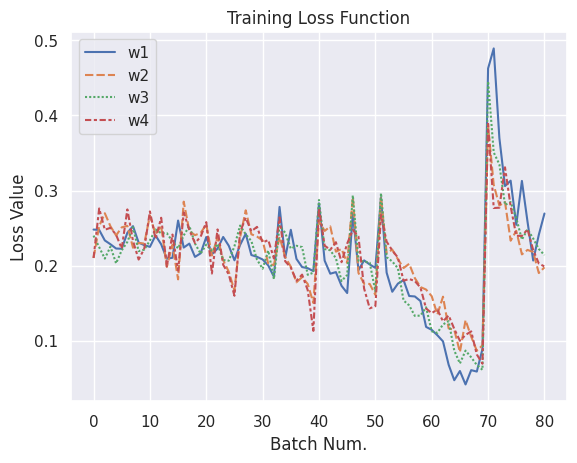

In [15]:
stats_train.get_loss_ts(plot=True)

In [16]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-05-27 17:14:26,522] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-05-27 17:14:26,523] Sending data to sources
[INFO][2024-05-27 17:14:26,941] Data is ready in sources
[INFO][2024-05-27 17:14:26,941] Phase prediction requested from Main Server
[INFO][2024-05-27 17:14:33,361] Processing experiment phase data
[INFO][2024-05-27 17:14:33,363] Processing experiment phase data completed
[INFO][2024-05-27 17:14:33,365] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-05-27 17:14:33,366] Statistics requested from Main Server
[INFO][2024-05-27 17:14:33,770] Statistics received from Main Server
[INFO][2024-05-27 17:14:33,772] Phase of prediction_phase prediction completed


In [17]:
stats_predict = API.get_experiment_flow(exp_name).generate_stats()

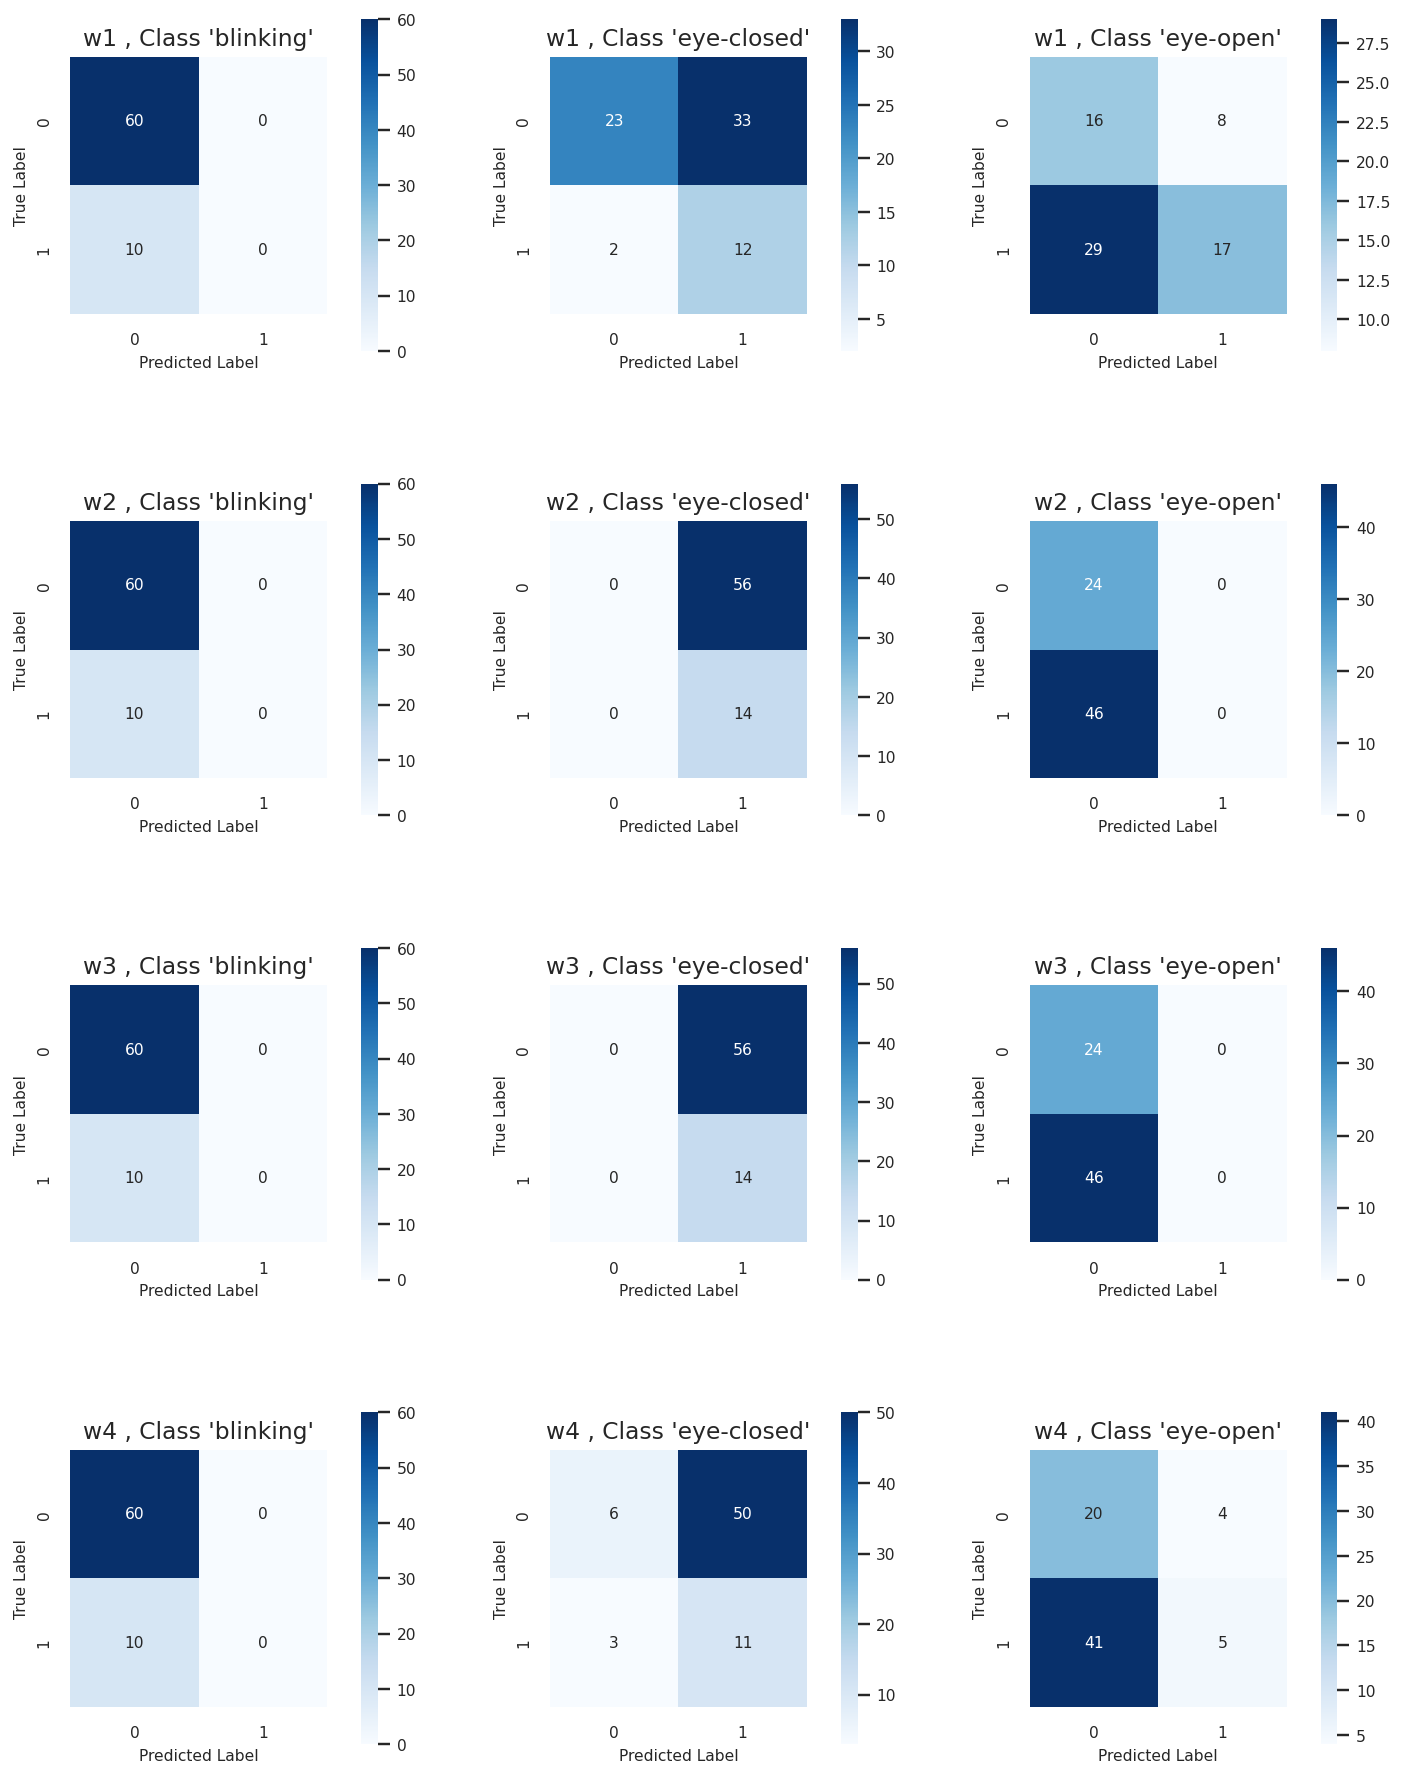

In [18]:
conf_mats_sources_workers , conf_mats_workers = stats_predict.get_confusion_matrices(plot=True)

In [19]:
model_perf = stats_predict.get_model_performence_stats(conf_mats_workers , show=True)

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w1,eye-closed,23,33,2,12,0.500000,0.633929,0.266667,0.857143,0.410714,0.267857,0.406780
1,w1,eye-open,16,8,29,17,0.471429,0.518116,0.680000,0.369565,0.666667,0.036232,0.478873
2,w1,blinking,60,0,10,0,0.857143,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
3,w2,eye-closed,0,56,0,14,0.200000,0.500000,0.200000,1.000000,0.000000,0.000000,0.333333
4,w2,eye-open,24,0,46,0,0.342857,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
5,w2,blinking,60,0,10,0,0.857143,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
6,w3,eye-closed,0,56,0,14,0.200000,0.500000,0.200000,1.000000,0.000000,0.000000,0.333333
7,w3,eye-open,24,0,46,0,0.342857,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
8,w3,blinking,60,0,10,0,0.857143,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
9,w4,eye-closed,6,50,3,11,0.242857,0.446429,0.180328,0.785714,0.107143,-0.107143,0.293333
